In [12]:
!wget wget -r -np -nH --cut-dirs=5 -R "index.html*" https://www.cmi-pb.org/downloads/cmipb_challenge_datasets/current/3rd_challenge/harmonized_and_processed_data/master_allData_batchCorrected_TSV/


--2024-10-27 22:19:26--  http://wget/
Resolving wget (wget)... failed: nodename nor servname provided, or not known.
wget: unable to resolve host address ‘wget’
--2024-10-27 22:19:26--  https://www.cmi-pb.org/downloads/cmipb_challenge_datasets/current/3rd_challenge/harmonized_and_processed_data/master_allData_batchCorrected_TSV/
Resolving www.cmi-pb.org (www.cmi-pb.org)... 8.37.117.56
Connecting to www.cmi-pb.org (www.cmi-pb.org)|8.37.117.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘master_allData_batchCorrected_TSV/index.html.tmp’

master_allData_batc     [ <=>                ]   3.00K  --.-KB/s    in 0s      

2024-10-27 22:19:26 (58.7 MB/s) - ‘master_allData_batchCorrected_TSV/index.html.tmp’ saved [3076]

Loading robots.txt; please ignore errors.
--2024-10-27 22:19:26--  https://www.cmi-pb.org/robots.txt
Reusing existing connection to www.cmi-pb.org:443.
HTTP request sent, awaiting response... 404 Not Found
2024-10

HTTP request sent, awaiting response... 200 OK
Length: 66219 (65K) [application/octet-stream]
Saving to: ‘master_allData_batchCorrected_TSV/plasma_cytokine_concentrations_by_legendplex_raw_data.tsv’

master_allData_batc 100%[===================>]  64.67K  --.-KB/s    in 0.001s  

2024-10-27 22:19:31 (76.5 MB/s) - ‘master_allData_batchCorrected_TSV/plasma_cytokine_concentrations_by_legendplex_raw_data.tsv’ saved [66219/66219]

--2024-10-27 22:19:31--  https://www.cmi-pb.org/downloads/cmipb_challenge_datasets/current/3rd_challenge/harmonized_and_processed_data/master_allData_batchCorrected_TSV/plasma_cytokine_concentrations_by_olink_batchCorrected_data.tsv
Reusing existing connection to www.cmi-pb.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 382321 (373K) [application/octet-stream]
Saving to: ‘master_allData_batchCorrected_TSV/plasma_cytokine_concentrations_by_olink_batchCorrected_data.tsv’

master_allData_batc 100%[===================>] 373.36K  --.-KB/s    in 0.009s 

In [12]:
import pandas as pd

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [13]:
subject_specimen = pd.read_csv('master_allData_batchCorrected_TSV/subject_specimen.tsv',sep='\t')

In [14]:
subject_specimen['specimen_id'] = subject_specimen['specimen_id'].astype(str)

In [15]:
train_data = subject_specimen[subject_specimen['dataset']!='2023_dataset']
test_data = subject_specimen[subject_specimen['dataset']=='2023_dataset']

In [16]:
train_data['specimen_id'] = train_data['specimen_id'].astype(str)
test_data['specimen_id'] = test_data['specimen_id'].astype(str)

<ipython-input-16-663de0f5a936>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['specimen_id'] = train_data['specimen_id'].astype(str)
<ipython-input-16-663de0f5a936>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['specimen_id'] = test_data['specimen_id'].astype(str)


In [18]:
gene_expression = pd.read_csv('master_allData_batchCorrected_TSV/pbmc_gene_expression_tpm_batchCorrected_data.tsv',sep='\t')

In [19]:
pbmc_cell_frequency = pd.read_csv('master_allData_batchCorrected_TSV/pbmc_cell_frequency_batchCorrected_data.tsv',sep='\t')

In [20]:
antibody_lvl = pd.read_csv('master_allData_batchCorrected_TSV/plasma_ab_titer_batchCorrected_data.tsv',sep='\t')

In [121]:
olink = pd.read_csv('master_allData_batchCorrected_TSV/plasma_cytokine_concentrations_by_olink_batchCorrected_data.tsv',sep='\t')

## Subset gene expression based on specimen of train and test

In [171]:
overlap_specimen_train = list(set(gene_expression.columns.astype(str)) & set(train_data['specimen_id']))
overlap_specimen_test = list(set(gene_expression.columns.astype(str)) & set(test_data['specimen_id']))

overlap_specimen_train = list(map(str, overlap_specimen_train))
gene_expression_subset_train = gene_expression[overlap_specimen_train]
train_data_subset = train_data[train_data.specimen_id.isin(overlap_specimen_train)]

overlap_specimen_test = list(map(str, overlap_specimen_test))
gene_expression_subset_test = gene_expression[overlap_specimen_test]
test_data_subset = test_data[test_data.specimen_id.isin(overlap_specimen_test)]

In [172]:
overlap_specimen_train = list(set(gene_expression.columns.astype(str)) & set(olink.columns.astype(str)) &
                              set(train_data['specimen_id']))
overlap_specimen_test = list(set(gene_expression.columns.astype(str)) & set(olink.columns.astype(str)) &
                             set(test_data['specimen_id']))

overlap_specimen_train = list(map(str, overlap_specimen_train))
gene_expression_subset_train = gene_expression[overlap_specimen_train]
olink_subset_train = olink[overlap_specimen_train]

overlap_specimen_test = list(map(str, overlap_specimen_test))
gene_expression_subset_test = gene_expression[overlap_specimen_test]
olink_subset_test = olink[overlap_specimen_test]

In [203]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Filter for the CCL3 gene  in gene expression matrix
ccl3_expression_train = gene_expression_subset_train.copy()
ccl3_expression_test = gene_expression_subset_test.copy()

# Step 2: Join metadata with gene expression data based on specimen_id
# Transpose gene_expression to align specimen_id as a column
gene_expression_t_train = gene_expression.T
gene_expression_t_train.reset_index(inplace=True)
gene_expression_t_train.rename(columns={'index': 'specimen_id'}, inplace=True)

olink_t_train = olink_subset_train.T
olink_t_train.reset_index(inplace=True)
olink_t_train.rename(columns={'index': 'specimen_id'}, inplace=True)

# Merge metadata 
#merged_data = pd.merge(train_data_subset, gene_expression_t_train, on='specimen_id')
#merged_data_train = pd.merge(merged_data, olink_t_train, on='specimen_id')
merged_data_train = pd.merge(train_data, gene_expression_t_train, on = 'specimen_id')

# same for test
gene_expression_t_test = gene_expression.T
gene_expression_t_test.reset_index(inplace=True)
gene_expression_t_test.rename(columns={'index': 'specimen_id'}, inplace=True)

olink_t_test = olink_subset_test.T
olink_t_test.reset_index(inplace=True)
olink_t_test.rename(columns={'index': 'specimen_id'}, inplace=True)

# Merge metadata 
#merged_data = pd.merge(test_data_subset, gene_expression_t_test, on='specimen_id')
#merged_data_test = pd.merge(merged_data, olink_t_test, on='specimen_id')
merged_data_test = pd.merge(test_data, gene_expression_t_test, on = 'specimen_id')

# CCL3 expression

In [208]:
import pandas as pd
import numpy as np
import joblib  # For saving models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import pearsonr, spearmanr

def prepare_features(data):
    # Extract features for each time point and merge them
    day_0_data = data[data['timepoint'] == 0].set_index('subject_id')
    features = pd.DataFrame(day_0_data.iloc[:, 7:], index=day_0_data.index)
    #scaler = StandardScaler()
    #features = scaler.fit_transform(features)
    #features = pd.DataFrame(features, index=day_0_data.index, 
     #                              columns=day_0_data.iloc[:, 7:].columns)

    features['Infancy_Vac'] = day_0_data['infancy_vac'].map({'wP': 0, 'aP': 1})
    features['Sex'] = day_0_data['biological_sex'].map({'Female': 0, 'Male': 1})
    return features

# Define a dictionary of models and their hyperparameter grids
models_and_parameters = {
    'Ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.01, 0.1, 1.0, 10.0]
        }
    }
}

# Initialize a list to store the results
results_list = []

# Iterate through each model and perform hyperparameter search
for model_name, model_info in models_and_parameters.items():
    print(f"Evaluating {model_name}...")
    pearson_correlations = []
    spearman_correlations = []
    best_model_instance = None
    highest_mean_score = -np.inf  # To track the best mean score for saving the model

    # Repeat the process 10 times
    for i in range(10):
        # Prepare the data
        X = prepare_features(merged_data_train)
        y = merged_data_train[merged_data_train['timepoint'] == 3].set_index('subject_id')['ENSG00000277632.1']
        y = y.loc[y.index.isin(X.index)]
        X = X.loc[X.index.isin(y.index)]
        
        # Split the data into 70% training and 30% testing
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

        # Perform hyperparameter search using RandomizedSearchCV
        model = model_info['model']
        param_grid = model_info['params']
        search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=10)
        search.fit(X_train, y_train)

        # Select the best model
        best_model = search.best_estimator_

        # Train the final model on the entire training set
        best_model.fit(X_train, y_train)

        # Evaluate on the test set
        y_test_pred = best_model.predict(X_test)

        # Calculate Pearson and Spearman correlations
        test_pearson_corr, _ = pearsonr(y_test, y_test_pred)
        test_spearman_corr, _ = spearmanr(y_test, y_test_pred)

        # Store results
        pearson_correlations.append(test_pearson_corr)
        spearman_correlations.append(test_spearman_corr)

        # Update the best model instance if it has the highest mean correlation so far
        if np.mean(pearson_correlations) > highest_mean_score:
            highest_mean_score = np.mean(pearson_correlations)
            best_model_instance = best_model

    # Save the best model for this type
    joblib.dump(best_model_instance, f"best_model_{model_name}_ccl3_expression.pkl")
    print(f"Best model for {model_name} saved as 'best_model_{model_name}_ccl3_expression.pkl'")

    # Calculate mean and standard deviation of correlations
    pearson_mean = np.mean(pearson_correlations)
    pearson_std = np.std(pearson_correlations)
    spearman_mean = np.mean(spearman_correlations)
    spearman_std = np.std(spearman_correlations)

    # Append the results to the list
    results_list.append({
        'Model': model_name,
        'Mean Pearson Correlation': pearson_mean,
        'Pearson Std': pearson_std,
        'Mean Spearman Correlation': spearman_mean,
        'Spearman Std': spearman_std
    })

# Convert the list to a DataFrame
results = pd.DataFrame(results_list)

# Print results
print(results)


Evaluating Ridge...
Best model for Ridge saved as 'best_model_Ridge_ccl3_expression.pkl'
   Model  Mean Pearson Correlation  Pearson Std  Mean Spearman Correlation  \
0  Ridge                  0.192941     0.196768                     0.2225   

   Spearman Std  
0      0.240556  


In [1]:
# import pandas as pd
# import numpy as np
# import joblib  # For saving models
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from xgboost import XGBRegressor
# from sklearn.model_selection import RandomizedSearchCV, train_test_split
# from sklearn.preprocessing import LabelEncoder
# from scipy.stats import pearsonr, spearmanr
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# def prepare_features(data, n_components=50):
#     # Extract features for each time point and merge them
#     day_0_data = data[data['timepoint'] == 0].set_index('subject_id')

#     # Extract all columns starting from the 7th column and drop 'ENSG00000277632.1'
#     #raw_features = pd.DataFrame(day_0_data.iloc[:, 7:], index=day_0_data.index)
#     pca_features_df = pd.DataFrame(day_0_data.iloc[:, 7:], index=day_0_data.index)
#     # Standardize the features
#     #scaler = StandardScaler()
#     #standardized_features = scaler.fit_transform(raw_features)
    
#     # Apply PCA to reduce dimensionality
#     #pca = PCA(n_components=n_components)
#     #pca_features = pca.fit_transform(standardized_features)

#     # Create a DataFrame from PCA-transformed features
#     #pca_features_df = pd.DataFrame(pca_features, index=day_0_data.index, 
#      #                              columns=[f'PCA_{i+1}' for i in range(n_components)])

#     # Add demographic features
#     pca_features_df['Infancy_Vac'] = day_0_data['infancy_vac'].map({'wP': 0, 'aP': 1})
#     pca_features_df['Sex'] = day_0_data['biological_sex'].map({'Female': 0, 'Male': 1})

#     return pca_features_df


# # Define a dictionary of models and their hyperparameter grids
# models_and_parameters = {
# #     'RandomForest': {
# #         'model': RandomForestRegressor(random_state=42),
# #         'params': {
# #             'n_estimators': [50, 100, 150],
# #             'max_depth': [3, 5, 10],
# #             'min_samples_split': [2, 5, 10]
# #         }
# #     },
# #     'GradientBoosting': {
# #         'model': GradientBoostingRegressor(random_state=42),
# #         'params': {
# #             'n_estimators': [50, 100, 200],
# #             'learning_rate': [0.01, 0.1, 0.2],
# #             'max_depth': [3, 5, 10]
# #         }
# #     },
#     'XGBoost': {
#         'model': XGBRegressor(random_state=42),
#         'params': {
#             'n_estimators': [50, 100, 200],
#             'learning_rate': [0.01, 0.1, 0.2],
#             'max_depth': [3, 5, 10]
#         }
#     }
# }

# # Initialize a list to store the results
# results_list = []

# # Iterate through each model and perform hyperparameter search
# for model_name, model_info in models_and_parameters.items():
#     print(f"Evaluating {model_name}...")
#     pearson_correlations = []
#     spearman_correlations = []
#     best_model_instance = None
#     highest_mean_score = -np.inf  # To track the best mean score for saving the model

#     # Repeat the process 10 times
#     for i in range(10):
#         # Prepare the data
#         X = prepare_features(merged_data_train)
#         y = merged_data_train[merged_data_train['timepoint'] == 3].set_index('subject_id')['ENSG00000277632.1']

#         # Split the data into 70% training and 30% testing
#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#         # Perform hyperparameter search using RandomizedSearchCV
#         model = model_info['model']
#         param_grid = model_info['params']
#         search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, scoring='r2', cv=5, random_state=42)
#         search.fit(X_train, y_train)

#         # Select the best model
#         best_model = search.best_estimator_

#         # Train the final model on the entire training set
#         best_model.fit(X_train, y_train)

#         # Evaluate on the test set
#         y_test_pred = best_model.predict(X_test)

#         # Calculate Pearson and Spearman correlations
#         test_pearson_corr, _ = pearsonr(y_test, y_test_pred)
#         test_spearman_corr, _ = spearmanr(y_test, y_test_pred)

#         # Store results
#         pearson_correlations.append(test_pearson_corr)
#         spearman_correlations.append(test_spearman_corr)

#         # Update the best model instance if it has the highest mean correlation so far
#         if np.mean(pearson_correlations) > highest_mean_score:
#             highest_mean_score = np.mean(pearson_correlations)
#             best_model_instance = best_model

#     # Save the best model for this type
#     joblib.dump(best_model_instance, f"best_model_{model_name}_ccl3_expression.pkl")
#     print(f"Best model for {model_name} saved as 'best_model_{model_name}.pkl'")

#     # Calculate mean and standard deviation of correlations
#     pearson_mean = np.mean(pearson_correlations)
#     pearson_std = np.std(pearson_correlations)
#     spearman_mean = np.mean(spearman_correlations)
#     spearman_std = np.std(spearman_correlations)

#     # Append the results to the list
#     results_list.append({
#         'Model': model_name,
#         'Mean Pearson Correlation': pearson_mean,
#         'Pearson Std': pearson_std,
#         'Mean Spearman Correlation': spearman_mean,
#         'Spearman Std': spearman_std
#     })

# # Convert the list to a DataFrame
# results = pd.DataFrame(results_list)


<ipython-input-39-7f84c9096c48>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(pearson_labels)  # Update x-axis labels
<ipython-input-39-7f84c9096c48>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(spearman_labels)  # Update x-axis labels


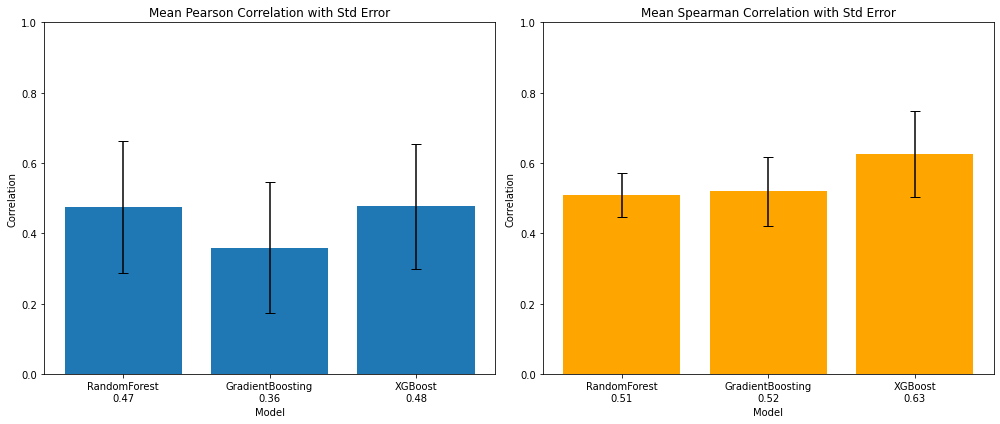

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'results' DataFrame is already created
# Create new labels that include the model name and mean correlation values
pearson_labels = [
    f"{model}\n{mean:.2f}" for model, mean in zip(results['Model'], results['Mean Pearson Correlation'])
]
spearman_labels = [
    f"{model}\n{mean:.2f}" for model, mean in zip(results['Model'], results['Mean Spearman Correlation'])
]

# Plotting the results
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plotting Mean Pearson Correlation
ax[0].bar(results['Model'], results['Mean Pearson Correlation'], yerr=results['Pearson Std'], capsize=5)
ax[0].set_title('Mean Pearson Correlation with Std Error')
ax[0].set_ylabel('Correlation')
ax[0].set_xlabel('Model')
ax[0].set_ylim(0, 1)  # Adjust the y-axis range if needed
ax[0].set_xticklabels(pearson_labels)  # Update x-axis labels

# Plotting Mean Spearman Correlation
ax[1].bar(results['Model'], results['Mean Spearman Correlation'], yerr=results['Spearman Std'], capsize=5, color='orange')
ax[1].set_title('Mean Spearman Correlation with Std Error')
ax[1].set_ylabel('Correlation')
ax[1].set_xlabel('Model')
ax[1].set_ylim(0, 1)  # Adjust the y-axis range if needed
ax[1].set_xticklabels(spearman_labels)  # Update x-axis labels

# Adjust layout
plt.tight_layout()
plt.show()


## Make prediction CCL3 expression

In [213]:
# Load the saved model
model_filename = 'best_model_Ridge_ccl3_expression.pkl'  
loaded_model = joblib.load(model_filename)

# Prepare new data for prediction (using the same `prepare_features` function as before)
new_data = prepare_features(merged_data_test)  # Replace with your actual test data DataFrame

# Use the loaded model to make predictions
predictions = loaded_model.predict(new_data)

# Create a DataFrame to store specimen_id and predictions
results_df_ccl3exp = pd.DataFrame({
    'subject_id': new_data.index,
    'predicted_ccl3_expression': predictions
})

# Rank individuals based on predicted values, with rank 1 being the highest
results_df_ccl3exp['rank'] = results_df_ccl3exp['predicted_ccl3_expression'].rank(ascending=False, method='min')

# Sort the DataFrame by rank
results_df_ccl3exp.sort_values(by='rank', inplace=True)

# CCL3 fold change

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr, spearmanr

def prepare_features(data):
    # Extract features for each time point and merge them
    day_0_data = data[data['timepoint'] == 0].set_index('subject_id')
    features = pd.DataFrame(day_0_data.iloc[:, 7:], index=day_0_data.index)
    #scaler = StandardScaler()
    #features = scaler.fit_transform(features)
    #features = pd.DataFrame(features, index=day_0_data.index, 
     #                              columns=day_0_data.iloc[:, 7:].columns)

    features['Infancy_Vac'] = day_0_data['infancy_vac'].map({'wP': 0, 'aP': 1})
    features['Sex'] = day_0_data['biological_sex'].map({'Female': 0, 'Male': 1})
    return features

# Prepare the target variable as the fold change of CCL3 expression between Day 0 and Day 3
def prepare_target(data):
    day_0_expression = data[data['timepoint'] == 0].set_index('subject_id')['ENSG00000277632.1']
    day_3_expression = data[data['timepoint'] == 3].set_index('subject_id')['ENSG00000277632.1']
    fold_change = (day_3_expression / day_0_expression).replace([np.inf, -np.inf], np.nan).dropna()
    return fold_change

# Initialize a DataFrame to store the results
results_list = []

# Define a dictionary of models and their hyperparameter grids
models_and_parameters = {
    'RandomForest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 10],
            'min_samples_split': [2, 5, 10]
    }
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 10]
        }
    },
    'XGBoost': {
        'model': XGBRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 10]
        }
    }
}

models_and_parameters = {
    'Ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.01, 0.1, 1.0, 10.0]
        }
    }
}


# Initialize a list to store the results
results_list = []

# Iterate through each model and perform hyperparameter search
for model_name, model_info in models_and_parameters.items():
    print(f"Evaluating {model_name}...")
    pearson_correlations = []
    spearman_correlations = []
    best_model_instance = None
    highest_mean_score = -np.inf  # To track the best mean score for saving the model

    # Repeat the process 10 times
    for i in range(10):
        # Prepare the data
        X = prepare_features(merged_data_train)
        y = prepare_target(merged_data_train)
        
        # Split the data into 70% training and 30% testing
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

        # Perform hyperparameter search using RandomizedSearchCV
        model = model_info['model']
        param_grid = model_info['params']
        search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=10)
        search.fit(X_train, y_train)

        # Select the best model
        best_model = search.best_estimator_

        # Train the final model on the entire training set
        best_model.fit(X_train, y_train)

        # Evaluate on the test set
        y_test_pred = best_model.predict(X_test)

        # Calculate Pearson and Spearman correlations
        test_pearson_corr, _ = pearsonr(y_test, y_test_pred)
        test_spearman_corr, _ = spearmanr(y_test, y_test_pred)

        # Store results
        pearson_correlations.append(test_pearson_corr)
        spearman_correlations.append(test_spearman_corr)

        # Update the best model instance if it has the highest mean correlation so far
        if np.mean(pearson_correlations) > highest_mean_score:
            highest_mean_score = np.mean(pearson_correlations)
            best_model_instance = best_model

    # Save the best model for this type
    joblib.dump(best_model_instance, f"best_model_{model_name}_ccl3_foldchange.pkl")
    print(f"Best model for {model_name} saved as 'best_model_{model_name}_ccl3_foldchange.pkl'")

    # Calculate mean and standard deviation of correlations
    pearson_mean = np.mean(pearson_correlations)
    pearson_std = np.std(pearson_correlations)
    spearman_mean = np.mean(spearman_correlations)
    spearman_std = np.std(spearman_correlations)

    # Append the results to the list
    results_list.append({
        'Model': model_name,
        'Mean Pearson Correlation': pearson_mean,
        'Pearson Std': pearson_std,
        'Mean Spearman Correlation': spearman_mean,
        'Spearman Std': spearman_std
    })

# Convert the list to a DataFrame
results = pd.DataFrame(results_list)

<ipython-input-77-2710228188b5>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(pearson_labels)  # Update x-axis labels
<ipython-input-77-2710228188b5>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(spearman_labels)  # Update x-axis labels


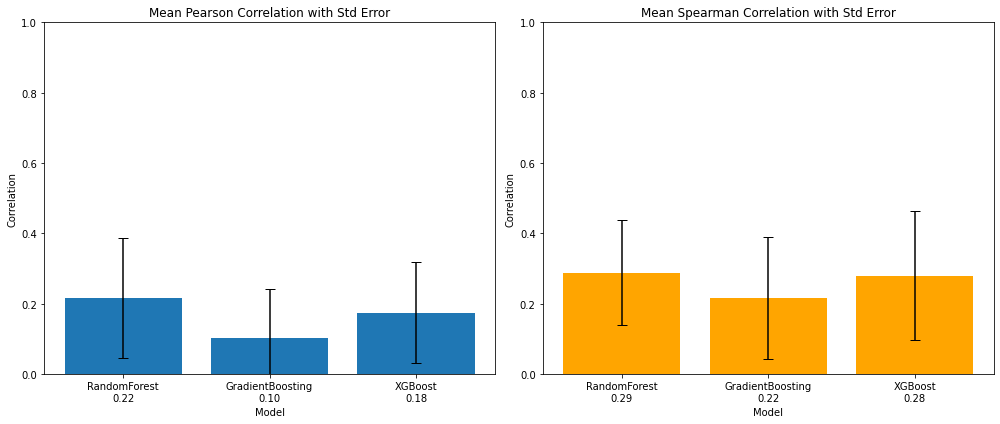

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'results' DataFrame is already created
# Create new labels that include the model name and mean correlation values
pearson_labels = [
    f"{model}\n{mean:.2f}" for model, mean in zip(results_ccl3_fc['Model'], results_ccl3_fc['Mean Pearson Correlation'])
]
spearman_labels = [
    f"{model}\n{mean:.2f}" for model, mean in zip(results_ccl3_fc['Model'], results_ccl3_fc['Mean Spearman Correlation'])
]

# Plotting the results
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plotting Mean Pearson Correlation
ax[0].bar(results_ccl3_fc['Model'], results_ccl3_fc['Mean Pearson Correlation'], yerr=results_ccl3_fc['Pearson Std'], capsize=5)
ax[0].set_title('Mean Pearson Correlation with Std Error')
ax[0].set_ylabel('Correlation')
ax[0].set_xlabel('Model')
ax[0].set_ylim(0, 1)  # Adjust the y-axis range if needed
ax[0].set_xticklabels(pearson_labels)  # Update x-axis labels

# Plotting Mean Spearman Correlation
ax[1].bar(results_ccl3_fc['Model'], results_ccl3_fc['Mean Spearman Correlation'], yerr=results_ccl3_fc['Spearman Std'], capsize=5, color='orange')
ax[1].set_title('Mean Spearman Correlation with Std Error')
ax[1].set_ylabel('Correlation')
ax[1].set_xlabel('Model')
ax[1].set_ylim(0, 1)  # Adjust the y-axis range if needed
ax[1].set_xticklabels(spearman_labels)  # Update x-axis labels

# Adjust layout
plt.tight_layout()
plt.show()


## Make prediction - CCL3 fold change

In [218]:
# Load the saved model
model_filename = 'best_model_Ridge_ccl3_foldchange.pkl'  
loaded_model = joblib.load(model_filename)

# Prepare new data for prediction (using the same `prepare_features` function as before)
new_data = prepare_features(merged_data_test)  # Replace with your actual test data DataFrame

# Use the loaded model to make predictions
predictions = loaded_model.predict(new_data)

# Create a DataFrame to store specimen_id and predictions
results_df_ccl3fc = pd.DataFrame({
    'subject_id': new_data.index,
    'predicted_ccl3_fc': predictions
})

# Rank individuals based on predicted values, with rank 1 being the highest
results_df_ccl3fc['rank'] = results_df_ccl3fc['predicted_ccl3_fc'].rank(ascending=False, method='min')

# Sort the DataFrame by rank
results_df_ccl3fc.sort_values(by='rank', inplace=True)

# Cell frequency task

In [278]:
from sklearn.preprocessing import LabelEncoder

# Transpose gene_expression to align specimen_id as a column
cell_frequency_t = pbmc_cell_frequency.T
cell_frequency_t.reset_index(inplace=True)
cell_frequency_t.rename(columns={'index': 'specimen_id'}, inplace=True)

# Merge metadata with the transposed gene expression matrix
merged_data_train = pd.merge(train_data, cell_frequency_t, on='specimen_id')
merged_data_test = pd.merge(test_data, cell_frequency_t, on='specimen_id')


In [244]:
import pandas as pd
import numpy as np
import joblib  # For saving models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr, spearmanr

# Function to prepare features
def prepare_features(data):
    # Extract features for each time point and merge them
    day_0_data = data[data['timepoint'] == 0].set_index('subject_id')
    features = pd.DataFrame(day_0_data.iloc[:, 7:], index=day_0_data.index)
    features['Infancy_Vac'] = day_0_data['infancy_vac'].map({'wP': 0, 'aP': 1})
    features['Sex'] = day_0_data['biological_sex'].map({'Female': 0, 'Male': 1})
    return features

# Function to prepare the target variable
def prepare_target(data):
    day_0_expression = data[data['timepoint'] == 0].set_index('subject_id')['Monocytes']
    day_3_expression = data[data['timepoint'] == 3].set_index('subject_id')['Monocytes']
    fold_change = (day_3_expression / day_0_expression).replace([np.inf, -np.inf], np.nan).dropna()
    return fold_change

# Define models and hyperparameter grids
models_and_parameters = {
    'RandomForest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 10],
            'min_samples_split': [2, 5, 10]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 10]
        }
    },
    'XGBoost': {
        'model': XGBRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 10]
        }
    }
}

# Initialize a list to store the results
results_list = []

# Iterate through each model and perform hyperparameter search
for model_name, model_info in models_and_parameters.items():
    print(f"Evaluating {model_name}...")
    pearson_correlations = []
    spearman_correlations = []
    best_model_instance = None
    highest_mean_score = -np.inf  # Track highest mean score

    # Repeat the process 10 times
    for i in range(10):
        # Prepare data
        X = prepare_features(merged_data_train)
        y = merged_data_train[merged_data_train['timepoint'] == 1].set_index('subject_id')['Monocytes']

        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

        # Hyperparameter search using RandomizedSearchCV
        model = model_info['model']
        param_grid = model_info['params']
        search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=20, scoring='r2', cv=5, random_state=42)
        search.fit(X_train, y_train)

        # Select the best model
        best_model = search.best_estimator_

        # Train the final model on the entire training set
        best_model.fit(X_train, y_train)

        # Evaluate on the test set
        y_test_pred = best_model.predict(X_test)

        # Calculate correlations
        test_pearson_corr, _ = pearsonr(y_test, y_test_pred)
        test_spearman_corr, _ = spearmanr(y_test, y_test_pred)

        # Store results
        pearson_correlations.append(test_pearson_corr)
        spearman_correlations.append(test_spearman_corr)

        # Save the model if it's the best so far
        if np.mean(pearson_correlations) > highest_mean_score:
            highest_mean_score = np.mean(pearson_correlations)
            best_model_instance = best_model

    # Save the best model to file
    joblib.dump(best_model_instance, f"best_model_{model_name}_monocyte.pkl")
    print(f"Best model for {model_name} saved as 'best_model_{model_name}_monocyte.pkl'")

    # Calculate mean and std of correlations
    pearson_mean = np.mean(pearson_correlations)
    pearson_std = np.std(pearson_correlations)
    spearman_mean = np.mean(spearman_correlations)
    spearman_std = np.std(spearman_correlations)

    # Append results to the list
    results_list.append({
        'Model': model_name,
        'Mean Pearson Correlation': pearson_mean,
        'Pearson Std': pearson_std,
        'Mean Spearman Correlation': spearman_mean,
        'Spearman Std': spearman_std
    })

# Convert results to DataFrame and print
results = pd.DataFrame(results_list)


Evaluating RandomForest...
Best model for RandomForest saved as 'best_model_RandomForest_monocyte.pkl'
Evaluating GradientBoosting...
Best model for GradientBoosting saved as 'best_model_GradientBoosting_monocyte.pkl'
Evaluating XGBoost...
Best model for XGBoost saved as 'best_model_XGBoost_monocyte.pkl'


In [255]:
results

,Model,Mean Pearson Correlation,Pearson Std,Mean Spearman Correlation,Spearman Std
0,RandomForest,0.600204,0.080507,0.534131,0.106952
1,GradientBoosting,0.418026,0.174549,0.368159,0.201961
2,XGBoost,0.481739,0.132003,0.419417,0.151440


<ipython-input-253-7f84c9096c48>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(pearson_labels)  # Update x-axis labels
<ipython-input-253-7f84c9096c48>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(spearman_labels)  # Update x-axis labels


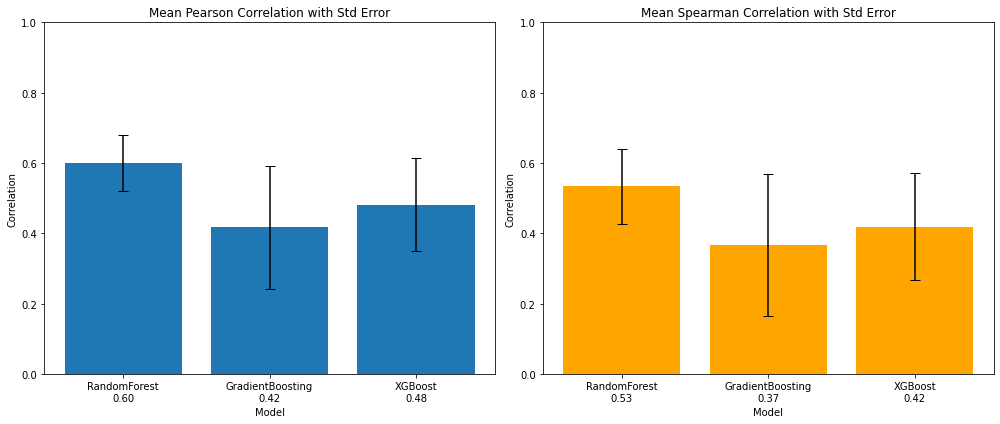

In [253]:
import pandas as pd
import matplotlib.pyplot as plt

pearson_labels = [
    f"{model}\n{mean:.2f}" for model, mean in zip(results['Model'], results['Mean Pearson Correlation'])
]
spearman_labels = [
    f"{model}\n{mean:.2f}" for model, mean in zip(results['Model'], results['Mean Spearman Correlation'])
]

# Plotting the results
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plotting Mean Pearson Correlation
ax[0].bar(results['Model'], results['Mean Pearson Correlation'], yerr=results['Pearson Std'], capsize=5)
ax[0].set_title('Mean Pearson Correlation with Std Error')
ax[0].set_ylabel('Correlation')
ax[0].set_xlabel('Model')
ax[0].set_ylim(0, 1)  # Adjust the y-axis range if needed
ax[0].set_xticklabels(pearson_labels)  # Update x-axis labels

# Plotting Mean Spearman Correlation
ax[1].bar(results['Model'], results['Mean Spearman Correlation'], yerr=results['Spearman Std'], capsize=5, color='orange')
ax[1].set_title('Mean Spearman Correlation with Std Error')
ax[1].set_ylabel('Correlation')
ax[1].set_xlabel('Model')
ax[1].set_ylim(0, 1)  # Adjust the y-axis range if needed
ax[1].set_xticklabels(spearman_labels)  # Update x-axis labels

# Adjust layout
plt.tight_layout()
plt.show()


## Make prediction monocyte frequency 

In [246]:
# Load the saved model
model_filename = 'best_model_RandomForest_monocyte.pkl'  
loaded_model = joblib.load(model_filename)

# Prepare new data for prediction (using the same `prepare_features` function as before)
new_data = prepare_features(merged_data_test)  # Replace with your actual test data DataFrame

# Use the loaded model to make predictions
predictions = loaded_model.predict(new_data)

# Create a DataFrame to store specimen_id and predictions
results_df_monocyte = pd.DataFrame({
    'subject_id': new_data.index,
    'predicted_monocyte': predictions
})

# Rank individuals based on predicted values, with rank 1 being the highest
results_df_monocyte['rank'] = results_df_monocyte['predicted_monocyte'].rank(ascending=False, method='min')

# Sort the DataFrame by rank
results_df_monocyte.sort_values(by='rank', inplace=True)

# Monocyte frequency fold change

In [3]:
import pandas as pd
import numpy as np
import joblib  # For saving models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr, spearmanr

# Function to prepare features
def prepare_features(data):
    # Extract features for each time point and merge them
    day_0_data = data[data['timepoint'] == 0].set_index('subject_id')
    features = pd.DataFrame(day_0_data['Monocytes'], index=day_0_data.index)
    features['Infancy_Vac'] = day_0_data['infancy_vac'].map({'wP': 0, 'aP': 1})
    features['Sex'] = day_0_data['biological_sex'].map({'Female': 0, 'Male': 1})
    return features

# Prepare the target variable as the fold change of Monocyte frequency between Day 0 and Day 1
def prepare_target(data):
    day_0_expression = data[data['timepoint'] == 0].set_index('subject_id')['Monocytes']
    day_1_expression = data[data['timepoint'] == 1].set_index('subject_id')['Monocytes']
    fold_change = (day_1_expression / day_0_expression).replace([np.inf, -np.inf], np.nan).dropna()
    return fold_change

# Initialize a DataFrame to store the results
results_list = []

# Define a dictionary of models and their hyperparameter grids
models_and_parameters = {
    'RandomForest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 10],
            'min_samples_split': [2, 5, 10]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 10]
        }
    },
    'XGBoost': {
        'model': XGBRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 10]
        }
    }
}

# Iterate through each model and perform hyperparameter search
for model_name, model_info in models_and_parameters.items():
    print(f"Evaluating {model_name}...")
    pearson_correlations = []
    spearman_correlations = []
    best_model_instance = None
    highest_mean_score = -np.inf  # To track the best mean score for saving the model

    # Repeat the process 10 times
    for i in range(10):
        # Prepare the data
        X = prepare_features(merged_data_train)
        y = prepare_target(merged_data_train)

        # Split the data into 70% training and 30% testing
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

        # Perform hyperparameter search using RandomizedSearchCV
        model = model_info['model']
        param_grid = model_info['params']
        search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, scoring='r2', cv=5, random_state=42)
        search.fit(X_train, y_train)

        # Select the best model
        best_model = search.best_estimator_

        # Train the final model on the entire training set
        best_model.fit(X_train, y_train)

        # Save the model after training
        joblib.dump(best_model, f"best_model_{model_name}_monocyte_fc.pkl")
        print(f"Best model for iteration {i + 1} of {model_name} saved as 'best_model_{model_name}_monocyte_fc.pkl'")

        # Evaluate on the test set
        y_test_pred = best_model.predict(X_test)

        # Calculate Pearson and Spearman correlations
        test_pearson_corr, _ = pearsonr(y_test, y_test_pred)
        test_spearman_corr, _ = spearmanr(y_test, y_test_pred)

        # Store results
        pearson_correlations.append(test_pearson_corr)
        spearman_correlations.append(test_spearman_corr)

    # Calculate mean and standard deviation of correlations
    pearson_mean = np.mean(pearson_correlations)
    pearson_std = np.std(pearson_correlations)
    spearman_mean = np.mean(spearman_correlations)
    spearman_std = np.std(spearman_correlations)

    # Append the results to the list
    results_list.append({
        'Model': model_name,
        'Mean Pearson Correlation': pearson_mean,
        'Pearson Std': pearson_std,
        'Mean Spearman Correlation': spearman_mean,
        'Spearman Std': spearman_std
    })

# Convert the list to a DataFrame
results_monocyte_fc = pd.DataFrame(results_list)


In [284]:
results_monocyte_fc

,Model,Mean Pearson Correlation,Pearson Std,Mean Spearman Correlation,Spearman Std
0,RandomForest,0.311187,0.143855,0.309058,0.161888
1,GradientBoosting,0.236382,0.184539,0.204825,0.233773
2,XGBoost,0.205302,0.184097,0.243239,0.187277


<ipython-input-285-2983fbd4f581>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(pearson_labels)  # Update x-axis labels
<ipython-input-285-2983fbd4f581>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(spearman_labels)  # Update x-axis labels


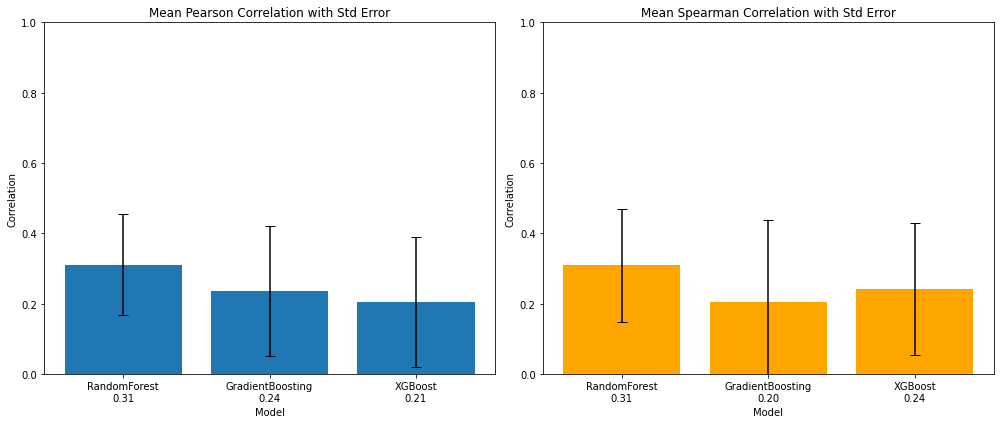

In [285]:
import pandas as pd
import matplotlib.pyplot as plt

pearson_labels = [
    f"{model}\n{mean:.2f}" for model, mean in zip(results_monocyte_fc['Model'], results_monocyte_fc['Mean Pearson Correlation'])
]
spearman_labels = [
    f"{model}\n{mean:.2f}" for model, mean in zip(results_monocyte_fc['Model'], results_monocyte_fc['Mean Spearman Correlation'])
]

# Plotting the results
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plotting Mean Pearson Correlation
ax[0].bar(results_monocyte_fc['Model'], results_monocyte_fc['Mean Pearson Correlation'], yerr=results_monocyte_fc['Pearson Std'], capsize=5)
ax[0].set_title('Mean Pearson Correlation with Std Error')
ax[0].set_ylabel('Correlation')
ax[0].set_xlabel('Model')
ax[0].set_ylim(0, 1)  # Adjust the y-axis range if needed
ax[0].set_xticklabels(pearson_labels)  # Update x-axis labels

# Plotting Mean Spearman Correlation
ax[1].bar(results_monocyte_fc['Model'], results_monocyte_fc['Mean Spearman Correlation'], yerr=results_monocyte_fc['Spearman Std'], capsize=5, color='orange')
ax[1].set_title('Mean Spearman Correlation with Std Error')
ax[1].set_ylabel('Correlation')
ax[1].set_xlabel('Model')
ax[1].set_ylim(0, 1)  # Adjust the y-axis range if needed
ax[1].set_xticklabels(spearman_labels)  # Update x-axis labels

# Adjust layout
plt.tight_layout()
plt.show()


## Make prediction monocyte fold change

In [289]:
import numpy as np

# Load the saved model
model_filename = 'best_model_RandomForest_monocyte_fc.pkl'  
loaded_model = joblib.load(model_filename)

# Prepare new data for prediction (using the same `prepare_features` function as before)
new_data = prepare_features(merged_data_test)  # Replace with your actual test data DataFrame

# Use the loaded model to make predictions
predictions = loaded_model.predict(new_data)

# Create a DataFrame to store specimen_id and predictions
results_df_monocyte_fc = pd.DataFrame({
    'subject_id': new_data.index,
    'predicted_monocyte_fc': predictions
})

# Shuffle the DataFrame to break ties randomly
results_df_monocyte_fc = results_df_monocyte_fc.sample(frac=1, random_state=42).reset_index(drop=True)

# Rank individuals based on predicted values, with rank 1 being the highest
results_df_monocyte_fc['rank'] = results_df_monocyte_fc['predicted_monocyte_fc'].rank(ascending=False, method='first')

# Sort the DataFrame by rank
results_df_monocyte_fc.sort_values(by='rank', inplace=True)

results_df_monocyte_fc


,subject_id,predicted_monocyte_fc,rank
20,125,1.570592,1.0
19,120,1.562937,2.0
38,160,1.510812,3.0
13,161,1.498573,4.0
18,124,1.329730,5.0
46,150,1.254319,6.0
25,146,1.242529,7.0
30,172,1.238641,8.0
17,168,1.211233,9.0
6,121,1.208852,10.0


# Antibody level

In [291]:
antibody_lvl_t = antibody_lvl.T
antibody_lvl_t.reset_index(inplace=True)
antibody_lvl_t.rename(columns={'index': 'specimen_id'}, inplace=True)

merged_data_train = pd.merge(train_data, antibody_lvl_t, on='specimen_id')
merged_data_test = pd.merge(test_data, antibody_lvl_t, on='specimen_id')

In [303]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr, spearmanr
import joblib  # For saving models

# Function to prepare features
def prepare_features(data):
    # Extract features for each time point and merge them
    day_0_data = data[data['timepoint'] == 0].set_index('subject_id')
    features = pd.DataFrame(day_0_data['IgG_PT'], index=day_0_data.index)
    features['Infancy_Vac'] = day_0_data['infancy_vac'].map({'wP': 0, 'aP': 1})
    features['Sex'] = day_0_data['biological_sex'].map({'Female': 0, 'Male': 1})
    return features

# Define a dictionary of models and their hyperparameter grids
models_and_parameters = {
    'RandomForest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 10],
            'min_samples_split': [2, 5, 10]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 10]
        }
    },
    'XGBoost': {
        'model': XGBRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 10]
        }
    }
}

# Initialize a list to store the results
results_list = []

# Iterate through each model and perform hyperparameter search
for model_name, model_info in models_and_parameters.items():
    print(f"Evaluating {model_name}...")
    pearson_correlations = []
    spearman_correlations = []
    best_model_instance = None
    highest_mean_score = -np.inf  # To track the highest mean score

    # Repeat the process 10 times
    for i in range(10):
        # Prepare the data
        X = prepare_features(merged_data_train)
        y = merged_data_train[merged_data_train['timepoint'] == 14].set_index('subject_id')['IgG_PT']
        
        y = y.loc[y.index.isin(X.index)]
        X = X.loc[y.index]
        
        # Split the data into 70% training and 30% testing
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

        # Perform hyperparameter search using RandomizedSearchCV
        model = model_info['model']
        param_grid = model_info['params']
        search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, scoring='r2', cv=5, random_state=42)
        search.fit(X_train, y_train)

        # Select the best model from the current run
        best_model = search.best_estimator_

        # Train the final model on the entire training set
        best_model.fit(X_train, y_train)

        # Evaluate on the test set
        y_test_pred = best_model.predict(X_test)

        # Calculate Pearson and Spearman correlations
        test_pearson_corr, _ = pearsonr(y_test, y_test_pred)
        test_spearman_corr, _ = spearmanr(y_test, y_test_pred)

        # Store results
        pearson_correlations.append(test_pearson_corr)
        spearman_correlations.append(test_spearman_corr)

        # Update the best model instance if it has the highest mean correlation so far
        current_mean_score = np.mean(pearson_correlations)
        if current_mean_score > highest_mean_score:
            highest_mean_score = current_mean_score
            best_model_instance = best_model

    # Save the best model for this model type
    joblib.dump(best_model_instance, f"best_model_{model_name}_igg_expression.pkl")
    print(f"Best model for {model_name} saved as 'best_model_{model_name}_igg_expression.pkl'")

    # Calculate mean and standard deviation of correlations
    pearson_mean = np.mean(pearson_correlations)
    pearson_std = np.std(pearson_correlations)
    spearman_mean = np.mean(spearman_correlations)
    spearman_std = np.std(spearman_correlations)

    # Append the results to the list
    results_list.append({
        'Model': model_name,
        'Mean Pearson Correlation': pearson_mean,
        'Pearson Std': pearson_std,
        'Mean Spearman Correlation': spearman_mean,
        'Spearman Std': spearman_std
    })

# Convert the list to a DataFrame
results_antibody_lvl = pd.DataFrame(results_list)

# Print results
print(results_antibody_lvl)


Evaluating RandomForest...
Best model for RandomForest saved as 'best_model_RandomForest_igg_expression.pkl'
Evaluating GradientBoosting...
Best model for GradientBoosting saved as 'best_model_GradientBoosting_igg_expression.pkl'
Evaluating XGBoost...
Best model for XGBoost saved as 'best_model_XGBoost_igg_expression.pkl'
              Model  Mean Pearson Correlation  Pearson Std  \
0      RandomForest                  0.330830     0.116088   
1  GradientBoosting                  0.293255     0.150893   
2           XGBoost                  0.248679     0.119819   

   Mean Spearman Correlation  Spearman Std  
0                   0.395789      0.111173  
1                   0.333857      0.137519  
2                   0.276586      0.142550  


<ipython-input-304-82eac875a122>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(pearson_labels)  # Update x-axis labels
<ipython-input-304-82eac875a122>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(spearman_labels)  # Update x-axis labels


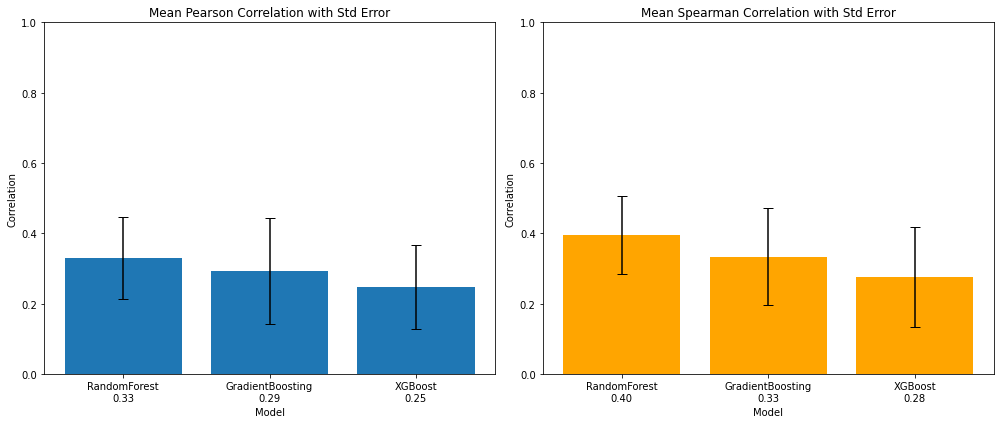

In [304]:
import pandas as pd
import matplotlib.pyplot as plt

pearson_labels = [
    f"{model}\n{mean:.2f}" for model, mean in zip(results_antibody_lvl['Model'], results_antibody_lvl['Mean Pearson Correlation'])
]
spearman_labels = [
    f"{model}\n{mean:.2f}" for model, mean in zip(results_antibody_lvl['Model'], results_antibody_lvl['Mean Spearman Correlation'])
]

# Plotting the results
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plotting Mean Pearson Correlation
ax[0].bar(results_antibody_lvl['Model'], results_antibody_lvl['Mean Pearson Correlation'], yerr=results_antibody_lvl['Pearson Std'], capsize=5)
ax[0].set_title('Mean Pearson Correlation with Std Error')
ax[0].set_ylabel('Correlation')
ax[0].set_xlabel('Model')
ax[0].set_ylim(0, 1)  # Adjust the y-axis range if needed
ax[0].set_xticklabels(pearson_labels)  # Update x-axis labels

# Plotting Mean Spearman Correlation
ax[1].bar(results_antibody_lvl['Model'], results_antibody_lvl['Mean Spearman Correlation'], yerr=results_antibody_lvl['Spearman Std'], capsize=5, color='orange')
ax[1].set_title('Mean Spearman Correlation with Std Error')
ax[1].set_ylabel('Correlation')
ax[1].set_xlabel('Model')
ax[1].set_ylim(0, 1)  # Adjust the y-axis range if needed
ax[1].set_xticklabels(spearman_labels)  # Update x-axis labels

# Adjust layout
plt.tight_layout()
plt.show()


# Make prediction antibody level

In [305]:
import numpy as np

# Load the saved model
model_filename = 'best_model_RandomForest_igg_expression.pkl'  
loaded_model = joblib.load(model_filename)

# Prepare new data for prediction (using the same `prepare_features` function as before)
new_data = prepare_features(merged_data_test)  # Replace with your actual test data DataFrame

# Use the loaded model to make predictions
predictions = loaded_model.predict(new_data)

# Create a DataFrame to store specimen_id and predictions
results_df_igg = pd.DataFrame({
    'subject_id': new_data.index,
    'predicted_igg': predictions
})

# Shuffle the DataFrame to break ties randomly
results_df_igg = results_df_igg.sample(frac=1, random_state=42).reset_index(drop=True)

# Rank individuals based on predicted values, with rank 1 being the highest
results_df_igg['rank'] = results_df_igg['predicted_igg'].rank(ascending=False, method='first')

# Sort the DataFrame by rank
results_df_igg.sort_values(by='rank', inplace=True)

results_df_igg


,subject_id,predicted_igg,rank
13,141,7.826430,1.0
34,165,7.810296,2.0
15,162,7.747015,3.0
32,155,7.453550,4.0
9,144,7.392271,5.0
4,159,7.309768,6.0
11,136,7.270055,7.0
8,139,7.203759,8.0
46,171,7.203759,9.0
10,121,7.190639,10.0


# Antibody level fold-change

In [313]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr, spearmanr
import joblib  # For saving models

# Function to prepare features
def prepare_features(data):
    day_0_data = data[data['timepoint'] == 0].set_index('subject_id')
    features = pd.DataFrame(day_0_data['IgG_PT'], index=day_0_data.index)
    features['Infancy_Vac'] = day_0_data['infancy_vac'].map({'wP': 0, 'aP': 1})
    features['Sex'] = day_0_data['biological_sex'].map({'Female': 0, 'Male': 1})
    return features

# Prepare the target variable as the fold change of IgG_PT expression between Day 0 and Day 14
def prepare_target(data):
    day_0_expression = data[data['timepoint'] == 0].set_index('subject_id')['IgG_PT']
    day_14_expression = data[data['timepoint'] == 14].set_index('subject_id')['IgG_PT']
    fold_change = (day_14_expression / day_0_expression).replace([np.inf, -np.inf], np.nan).dropna()
    return fold_change

# Define a dictionary of models and their hyperparameter grids
models_and_parameters = {
    'RandomForest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [3, 5, 10],
            'min_samples_split': [2, 5, 10]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 10]
        }
    },
    'XGBoost': {
        'model': XGBRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 10]
        }
    }
}

# Initialize a list to store the results
results_list = []

# Iterate through each model and perform hyperparameter search
for model_name, model_info in models_and_parameters.items():
    print(f"Evaluating {model_name}...")
    pearson_correlations = []
    spearman_correlations = []
    best_model_instance = None
    highest_mean_score = -np.inf  # Track the highest mean score for saving the best model

    # Repeat the process 10 times
    for i in range(10):
        # Prepare the data
        X = prepare_features(merged_data_train)
        y = prepare_target(merged_data_train)
        
        # Ensure data alignment and drop NA values
        X = X.loc[y.index].dropna()
        y = y.loc[X.index]

        # Split the data into 70% training and 30% testing
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

        # Perform hyperparameter search using RandomizedSearchCV
        model = model_info['model']
        param_grid = model_info['params']
        search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, scoring='r2', cv=5, random_state=42)
        search.fit(X_train, y_train)

        # Select the best model from the current run
        best_model = search.best_estimator_

        # Train the final model on the entire training set
        best_model.fit(X_train, y_train)

        # Evaluate on the test set
        y_test_pred = best_model.predict(X_test)

        # Calculate Pearson and Spearman correlations
        test_pearson_corr, _ = pearsonr(y_test, y_test_pred)
        test_spearman_corr, _ = spearmanr(y_test, y_test_pred)

        # Store results
        pearson_correlations.append(test_pearson_corr)
        spearman_correlations.append(test_spearman_corr)

        # Update the best model instance if it has the highest mean correlation so far
        current_mean_score = np.mean(pearson_correlations)
        if current_mean_score > highest_mean_score:
            highest_mean_score = current_mean_score
            best_model_instance = best_model

    # Save the best model for this model type
    joblib.dump(best_model_instance, f"best_model_{model_name}_igg_fc.pkl")
    print(f"Best model for {model_name} saved as 'best_model_{model_name}_igg_fc.pkl'")

    # Calculate mean and standard deviation of correlations
    pearson_mean = np.mean(pearson_correlations)
    pearson_std = np.std(pearson_correlations)
    spearman_mean = np.mean(spearman_correlations)
    spearman_std = np.std(spearman_correlations)

    # Append the results to the list
    results_list.append({
        'Model': model_name,
        'Mean Pearson Correlation': pearson_mean,
        'Pearson Std': pearson_std,
        'Mean Spearman Correlation': spearman_mean,
        'Spearman Std': spearman_std
    })

# Convert the list to a DataFrame
results_antibody_lvl_fc = pd.DataFrame(results_list)

# Print results
print(results_antibody_lvl_fc)

Evaluating RandomForest...
Best model for RandomForest saved as 'best_model_RandomForest_igg_fc.pkl'
Evaluating GradientBoosting...
Best model for GradientBoosting saved as 'best_model_GradientBoosting_igg_fc.pkl'
Evaluating XGBoost...
Best model for XGBoost saved as 'best_model_XGBoost_igg_fc.pkl'
              Model  Mean Pearson Correlation  Pearson Std  \
0      RandomForest                  0.688780     0.153326   
1  GradientBoosting                  0.644583     0.148951   
2           XGBoost                  0.632846     0.111950   

   Mean Spearman Correlation  Spearman Std  
0                   0.863556      0.112413  
1                   0.876674      0.052072  
2                   0.815238      0.098308  


<ipython-input-145-fceaafc4b44f>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(pearson_labels)  # Update x-axis labels
<ipython-input-145-fceaafc4b44f>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(spearman_labels)  # Update x-axis labels


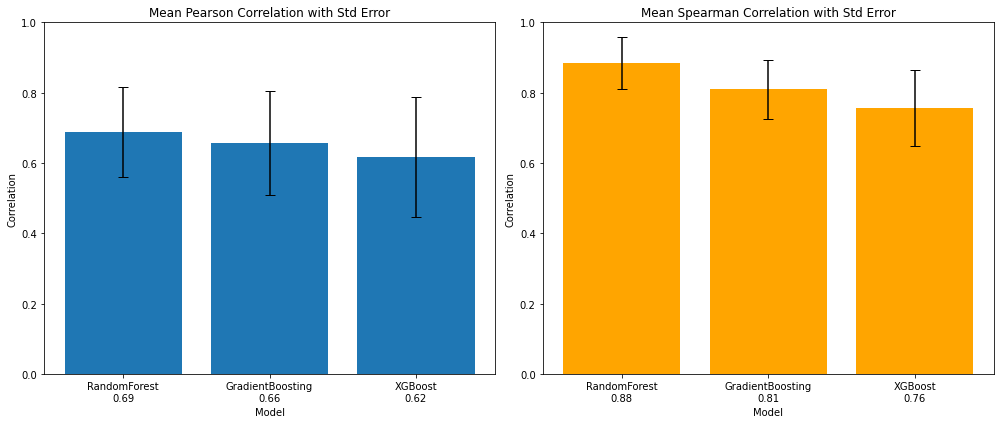

In [145]:
import pandas as pd
import matplotlib.pyplot as plt

pearson_labels = [
    f"{model}\n{mean:.2f}" for model, mean in zip(results_antibody_lvl_fc['Model'], results_antibody_lvl_fc['Mean Pearson Correlation'])
]
spearman_labels = [
    f"{model}\n{mean:.2f}" for model, mean in zip(results_antibody_lvl_fc['Model'], results_antibody_lvl_fc['Mean Spearman Correlation'])
]

# Plotting the results
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plotting Mean Pearson Correlation
ax[0].bar(results_antibody_lvl_fc['Model'], results_antibody_lvl_fc['Mean Pearson Correlation'], yerr=results_antibody_lvl_fc['Pearson Std'], capsize=5)
ax[0].set_title('Mean Pearson Correlation with Std Error')
ax[0].set_ylabel('Correlation')
ax[0].set_xlabel('Model')
ax[0].set_ylim(0, 1)  # Adjust the y-axis range if needed
ax[0].set_xticklabels(pearson_labels)  # Update x-axis labels

# Plotting Mean Spearman Correlation
ax[1].bar(results_antibody_lvl_fc['Model'], results_antibody_lvl_fc['Mean Spearman Correlation'], yerr=results_antibody_lvl_fc['Spearman Std'], capsize=5, color='orange')
ax[1].set_title('Mean Spearman Correlation with Std Error')
ax[1].set_ylabel('Correlation')
ax[1].set_xlabel('Model')
ax[1].set_ylim(0, 1)  # Adjust the y-axis range if needed
ax[1].set_xticklabels(spearman_labels)  # Update x-axis labels

# Adjust layout
plt.tight_layout()
plt.show()


# Make prediction antibody-fc

In [314]:
import numpy as np

# Load the saved model
model_filename = 'best_model_RandomForest_igg_fc.pkl'  
loaded_model = joblib.load(model_filename)

# Prepare new data for prediction (using the same `prepare_features` function as before)
new_data = prepare_features(merged_data_test)  # Replace with your actual test data DataFrame

# Use the loaded model to make predictions
predictions = loaded_model.predict(new_data)

# Create a DataFrame to store specimen_id and predictions
results_df_igg_fc = pd.DataFrame({
    'subject_id': new_data.index,
    'predicted_igg_fc': predictions
})

# Shuffle the DataFrame to break ties randomly
results_df_igg_fc = results_df_igg_fc.sample(frac=1, random_state=42).reset_index(drop=True)

# Rank individuals based on predicted values, with rank 1 being the highest
results_df_igg_fc['rank'] = results_df_igg_fc['predicted_igg_fc'].rank(ascending=False, method='first')

# Sort the DataFrame by rank
results_df_igg_fc.sort_values(by='rank', inplace=True)

results_df_igg_fc


,subject_id,predicted_igg_fc,rank
29,163,5.675821,1.0
20,167,4.198901,2.0
25,151,3.900545,3.0
17,134,3.747312,4.0
19,145,3.744710,5.0
7,169,3.674994,6.0
31,142,3.673863,7.0
39,154,3.673863,8.0
47,135,3.594224,9.0
46,171,3.593094,10.0


## Post-process the results

In [326]:
results_df_ccl3exp.rename(columns={'rank':'ccl3_exp'},inplace=True)
results_df_ccl3fc.rename(columns={'rank':'ccl3_fc'},inplace=True)
results_df_igg.rename(columns={'rank':'igg'},inplace=True)
results_df_igg_fc.rename(columns={'rank':'igg_fc'},inplace=True)
results_df_monocyte.rename(columns={'rank':'monocyte'},inplace=True)
results_df_monocyte_fc.rename(columns={'rank':'monocyte_fc'},inplace=True)

In [329]:
# Start by merging the first two DataFrames on their common column (e.g., 'gene' or 'index')
merged_df = results_df_ccl3exp[['subject_id','ccl3_exp']].merge(results_df_ccl3fc[['subject_id','ccl3_fc']], on='subject_id', how='outer')

# Merge the rest of the DataFrames
merged_df = merged_df.merge(results_df_igg[['subject_id','igg']], on='subject_id', how='outer')
merged_df = merged_df.merge(results_df_igg_fc[['subject_id','igg_fc']], on='subject_id', how='outer')
merged_df = merged_df.merge(results_df_monocyte[['subject_id','monocyte']], on='subject_id', how='outer')
merged_df = merged_df.merge(results_df_monocyte_fc[['subject_id','monocyte_fc']], on='subject_id', how='outer')

In [334]:
temp = pd.DataFrame(test_data.subject_id.unique(),columns=['subject_id'])

In [336]:
merged_df = merged_df.merge(temp[['subject_id']], on='subject_id', how='outer')

In [338]:
merged_df.to_csv('final_result_JF.csv',header=True,index=False)

In [345]:
task3_result = pd.read_csv('Predictions_final_v3.tsv',sep='\t')

In [376]:
template = pd.read_csv('master_allData_batchCorrected_TSV/3rdChallengeSubmissionTemplate_10032024.tsv',sep='\t')

In [359]:
merged_df.sort_values(by='subject_id',inplace=True)
merged_df.index = range(len(merged_df))

In [364]:
task3_result['4.1) IFNG/IL5-Polarization-D30-Rank'] = task3_result['4.1) IFNG/IL5-Polarization-D30-Rank'].max() + 1 - task3_result['4.1) IFNG/IL5-Polarization-D30-Rank']

In [377]:
template['1.1) IgG-PT-D14-titer-Rank'] = merged_df['igg']
template['1.2) IgG-PT-D14-FC-Rank'] = merged_df['igg_fc']
template['2.1) Monocytes-D1-Rank'] = merged_df['monocyte']
template['2.2) Monocytes-D1-FC-Rank'] = merged_df['monocyte_fc']
template['3.1) CCL3-D3-Rank'] = merged_df['ccl3_exp']
template['3.2) CCL3-D3-FC-Rank'] = merged_df['ccl3_fc']
template['4.1) IFNG/IL5-Polarization-D30-Rank'] = task3_result['4.1) IFNG/IL5-Polarization-D30-Rank']

In [393]:
temp = template.iloc[:, 4:].astype('Int64')
template = pd.concat([template.iloc[:,:4],temp],axis=1)

In [397]:
template.to_csv('final_result.tsv',header=True,index=False,sep='\t')